# 자료 안에서 삭제하거나 정보를 추가시킬 경우에는 다른(혹은 동일한) 이름으로 저장을 해야하지만,
# 자료 내부의 정보를 가지고 인덱스를 설정, 재배열하는 것은 다른(혹은 동일한) 이름으로 저장하면 안 된다.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# titanic 데이터를 load 해서 
# age 컬럼이 NaN이면 행을 삭제
# age 컬럼을 기준으로 중복을 제거한 데이터프레임을 추출

ti = sns.load_dataset('titanic')
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
ti = ti.dropna(subset = ['age'], how = 'any', axis = 0)   # dropna 는 subset을 사용한다.
ti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB


In [4]:
ti_age = ti.drop_duplicates(subset = ['age'])   # age 컬럼을 기준으로 나이가 같은 행을 제거
ti_age

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.00,0,0,51.8625,S,First,man,True,E,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
767,0,3,female,30.50,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,no,True
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
843,0,3,male,34.50,0,0,6.4375,C,Third,man,True,NaN,Cherbourg,no,True


# 모든 컬럼의 값이 같은 행을 제거

In [5]:
ti_dup = ti.drop_duplicates()                   
ti_dup

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
# 데이터 표준화

# dataset/auto-mpg.csv 파일을 load

df = pd.read_csv('../dataset/auto-mpg.csv', header = None)

# 컬럼명을 지정

df.columns = ['mpg', 'cylinders','displacement','horsepower',
             'weight', 'aceleration','model year','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,aceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [7]:
# 단위 환산 -> 따로 컬럼을 추가해서 작업하는 것이 편하다.
# mpg 단위 : 갤런 /mile -> 리터 /km 

mpg_to_kpl = 1.60934 / 3.78541        # (0.425)

df['kpl'] = df['mpg'] * mpg_to_kpl

df.head(3)

,mpg,cylinders,displacement,horsepower,weight,aceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.652571
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.377143
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.652571


In [8]:
df['kpl'] = df['kpl'].round(2)
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,aceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65


In [9]:
# 데이터의 자료형을 변환

df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
aceleration     float64
model year        int64
origin            int64
name             object
kpl             float64
dtype: object

In [10]:
df.horsepower.dtype   # = df['horsepower'].dtype

dtype('O')

In [11]:
df['horsepower'].astype(float)      # '?'가 있기 때문에 바꾸질 못함

ValueError: could not convert string to float: '?'

# horsepower의 자료를 검색, unique()

In [12]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [13]:
# 1. 특수문자 (?, ! 등) -> NaN으로 치환
# 2. NaN 데이터의 행을 삭제
# 3. 데이터의 형을 변환

In [14]:
df['horsepower'].replace('?', np.nan, inplace =True)
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [15]:
df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
df['horsepower'].unique()   

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    float64
 5   aceleration   392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
 9   kpl           392 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 33.7+ KB


In [17]:
df['horsepower'] = df['horsepower'].astype('float')        # astype의 경우에는 무조건 다른 곳에 저장
df['horsepower'].dtype

dtype('float64')

In [18]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
aceleration     float64
model year        int64
origin            int64
name             object
kpl             float64
dtype: object

In [19]:
print(df['origin'].unique())
                                 # 여러개를 replace할 때는 딕셔너리 형태
df['origin'].replace({1 : 'USA', 2 : 'EU', 3 : 'JPN'}, inplace = True)
df['origin'].unique()                                  # 분류로 나눠진 것 = 카테고리(category)

[1 3 2]


array(['USA', 'JPN', 'EU'], dtype=object)

In [20]:
# 문자형을 범주형으로 변환

df['origin'] = df['origin'].astype('category')
print(df['origin'].dtype)

category


In [21]:
# 문) 'model year'의 데이터 타입과 데이터를 확인해보고 범주형으로 형 변환

df['model year'].dtype

dtype('int64')

In [22]:
df['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [23]:
df['model year'] = df['model year'].astype('category')

In [24]:
print(df['model year'].dtype)

category


### np.histogram() 함수를 활용하면 각 구간의 경계선을 구할 수 있음

In [25]:
count, bin_dividers = np.histogram(df['horsepower'], bins = 3)     # 연속형 변수를 범주형으로 변환
print(count, bin_dividers)

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]


In [26]:
# pd.cut() 함수로 각각 데이터를 3개의 빈에 할당
# bin의 이름 정함

bin_names = ['저출력', '보통출력', '고출력']

df['hp_bin'] = pd.cut(x = df['horsepower'],       # 데이터 배열
                     bins = bin_dividers,         # 경계값 리스트
                     labels = bin_names,          # bin의 이름
                     include_lowest = True        # 첫 경계값 포함 여부
                     )

df[['horsepower', 'hp_bin']].head(15)

,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
6,220.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력


In [27]:
hp_dummies = pd.get_dummies(df['hp_bin'])      # 0과 1로만 데이터가 만들어짐
hp_dummies.head(15)

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [28]:
# 머신러닝 분석을 위한 라이브러리 sklearn, 딥러닝 tensorflow의 keras

from sklearn import preprocessing         # 전처리 모듈

# 전처리를 위한 encoder
label_encoder = preprocessing.LabelEncoder()   # 클래스 instance 생성 label encoder
onehot_encoder = preprocessing.OneHotEncoder()  # onehot encoder 생성

# lavel encoder 로 문자형 범주를 숫자형 범주로 변환
onehot_labeled = label_encoder.fit_transform(df['hp_bin'].head(15))

print(onehot_labeled); print()        # [1 1 1 1 1 0 0 0 0 0 0 1 1 0 2]

# 2차원 배열로 변환
onehot_reshape = onehot_labeled.reshape(len(onehot_labeled), 1)
print(onehot_reshape); print()

# 희소행렬로 변환
onehot_fitted = onehot_encoder.fit_transform(onehot_reshape)
print(onehot_fitted)

[1 1 1 1 1 0 0 0 0 0 0 1 1 0 2]

[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]]

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0


# 정규화 : 모든 실수를 0 ~ 1 또는 -1 ~ 1 사이의 수로 변환해주는 작업

In [29]:
# 해당 열의 최대값으로 모든 데이터를 나누어 저장

df['h_1'] = df.horsepower / abs(df.horsepower.max())       # abs = 절댓값
df[['horsepower', 'h_1']]

,horsepower,h_1
0,130.0,0.565217
1,165.0,0.717391
2,150.0,0.652174
3,150.0,0.652174
4,140.0,0.608696
...,...,...
393,86.0,0.373913
394,52.0,0.226087
395,84.0,0.365217
396,79.0,0.343478


In [30]:
# 해당 열의 (최대값 - 최소값) 으로 모든 데이터를 나누어 저장

df['h_1'] = df.horsepower / (df.horsepower.max() - df.horsepower.min())
df[['horsepower', 'h_1']]

,horsepower,h_1
0,130.0,0.706522
1,165.0,0.896739
2,150.0,0.815217
3,150.0,0.815217
4,140.0,0.760870
...,...,...
393,86.0,0.467391
394,52.0,0.282609
395,84.0,0.456522
396,79.0,0.429348


# 시계열 데이터

In [33]:
df = pd.read_csv('../dataset/stock-data.csv')

print(df.head()); print()

df.info()

         Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


## Date 컬럼의 자료를 new_Date 로 datetime 형식으로

In [34]:
df['new_Date'] = pd.to_datetime(df['Date'])            # new_Date 라는 새로운 컬럼을 추가
                                                       # to_datetime을 사용하여 dtype이 datetime이다
print(df.head()); print()

df.info()

         Date  Close  Start   High    Low  Volume   new_Date
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [35]:
# new_Date 컬럼을 인덱스로 설정
# Date 컬럼 삭제

df.set_index('new_Date', inplace = True)
df.drop('Date', axis = 1, inplace = True)

print(df.head()); print()

df.info()

            Close  Start   High    Low  Volume
new_Date                                      
2018-07-02  10100  10850  10900  10000  137977
2018-06-29  10700  10550  10900   9990  170253
2018-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2018-06-26  10800  10900  11000  10700   63039

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-07-02 to 2018-06-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   20 non-null     int64
 1   Start   20 non-null     int64
 2   High    20 non-null     int64
 3   Low     20 non-null     int64
 4   Volume  20 non-null     int64
dtypes: int64(5)
memory usage: 960.0 bytes


<AxesSubplot:xlabel='new_Date'>

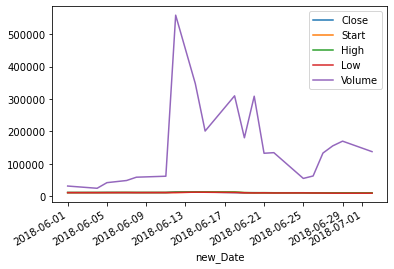

In [36]:
df.plot()

In [38]:
dates = ['2019-01-01', '2020-03-01', '2021-06-01']

# str 을 timestamp로 변환 : datetime

td_date = pd.to_datetime(dates)
td_date.dtype

dtype('<M8[ns]')

In [43]:
td_day = td_date.to_period(freq = 'M')    # freq = 'D' 날짜, 'M' 월, 'A' 연도
td_day

PeriodIndex(['2019-01', '2020-03', '2021-06'], dtype='period[M]')

In [48]:
# 날짜를 분리
# 위의 방식으로 object 형식의 Date를 바꾸기

df = pd.read_csv('../dataset/stock-data.csv')
print(df.head()); print()

df.info()

         Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [51]:
df['new_Date'] = pd.to_datetime(df['Date'])     
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [52]:
df.head()

,Date,Close,Start,High,Low,Volume,new_Date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


In [54]:
# 데이터가 datetime 형식일 떼 : dt.year, dt.month, dt.day

df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day

df.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Dat,Day
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2,2
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29,29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26,26


In [59]:
# 종가, 시작가, 연, 월, 일, new_Date만 추출 -> df_stock에 저장, new_Date를 인덱스로 설정

df_stock = df.loc[:, ['Close', 'Start', 'Year', 'Month', 'Day', 'new_Date']]
df_stock.set_index('new_Date', inplace = True)
df_stock.head()

,Close,Start,Year,Month,Day
new_Date,,,,,
2018-07-02,10100,10850,2018,7,2
2018-06-29,10700,10550,2018,6,29
2018-06-28,10400,10900,2018,6,28
2018-06-27,10900,10800,2018,6,27
2018-06-26,10800,10900,2018,6,26


In [62]:
# %load 한글.py
#!/usr/bin/env python

# In[ ]:


import matplotlib.pyplot as plt

from matplotlib import rc

rc('font', family = 'Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False



C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_8560/490031759.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_stock.index, rotation = 'vertical')


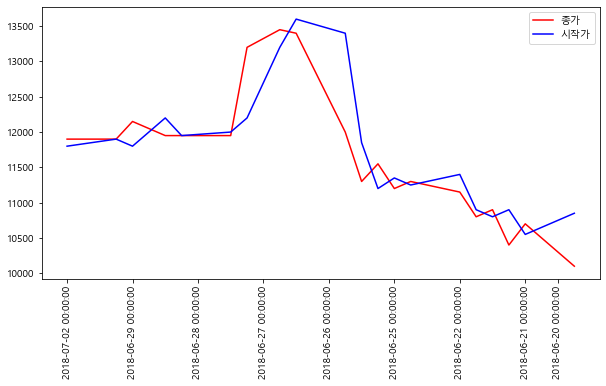

In [66]:
# 한 그래프에 여러가지 자료 넣기

fig = plt.figure(figsize = (10, 5))

# 빈 그래프 생성
ax = fig.add_subplot(1, 1, 1)

ax.plot(df_stock.index, df_stock['Close'], label = '종가', color = 'red')
ax.plot(df_stock.index, df_stock['Start'], label = '시작가', color = 'blue')

ax.legend(loc = 'best')

ax.set_xticklabels(df_stock.index, rotation = 'vertical')

plt.show()